<a href="https://colab.research.google.com/github/kaapivalli/Machine-Learning/blob/main/credit_card_fraud_detection_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
os.listdir('.')

['.config', 'credit_card.csv', 'sample_data']

# FETCHING CSV DATA

In [ ]:
df=pd.read_csv('credit_card.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# CHECKING THE DATA

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# amt has min=0 max=25,691 and mean=88
# so there are more transactions with less amts

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#imbalanced dataset

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# HANDLING DATA IMBALANCES

!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x_cols=df.columns[:-1].tolist()
# i didn't use this later on

In [ ]:
yy=df['Class']
xx=df.drop('Class',axis='columns')
xx

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
yy.shape

(284807,)

In [ ]:
smote = SMOTE(sampling_strategy='minority')
dfx, dfy = smote.fit_resample(xx,yy)

# Plotting

In [ ]:
#NOTE: DON'T PLOT THE STANDARDIZED DATA

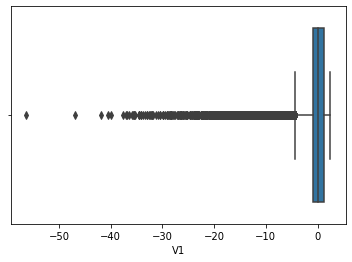

In [ ]:
sns.boxplot(data=df,x='V1')  # the below are the outliers which fall outside the 3rd quartile of data
# it could  be possible that these outliers might hold info about fradulent activities
# which will surely be out of normal transactions' ranges...let's try building a model having these outliers
# later if it negatively affects the accuracy, then we'll remove it before building another model

<AxesSubplot:>

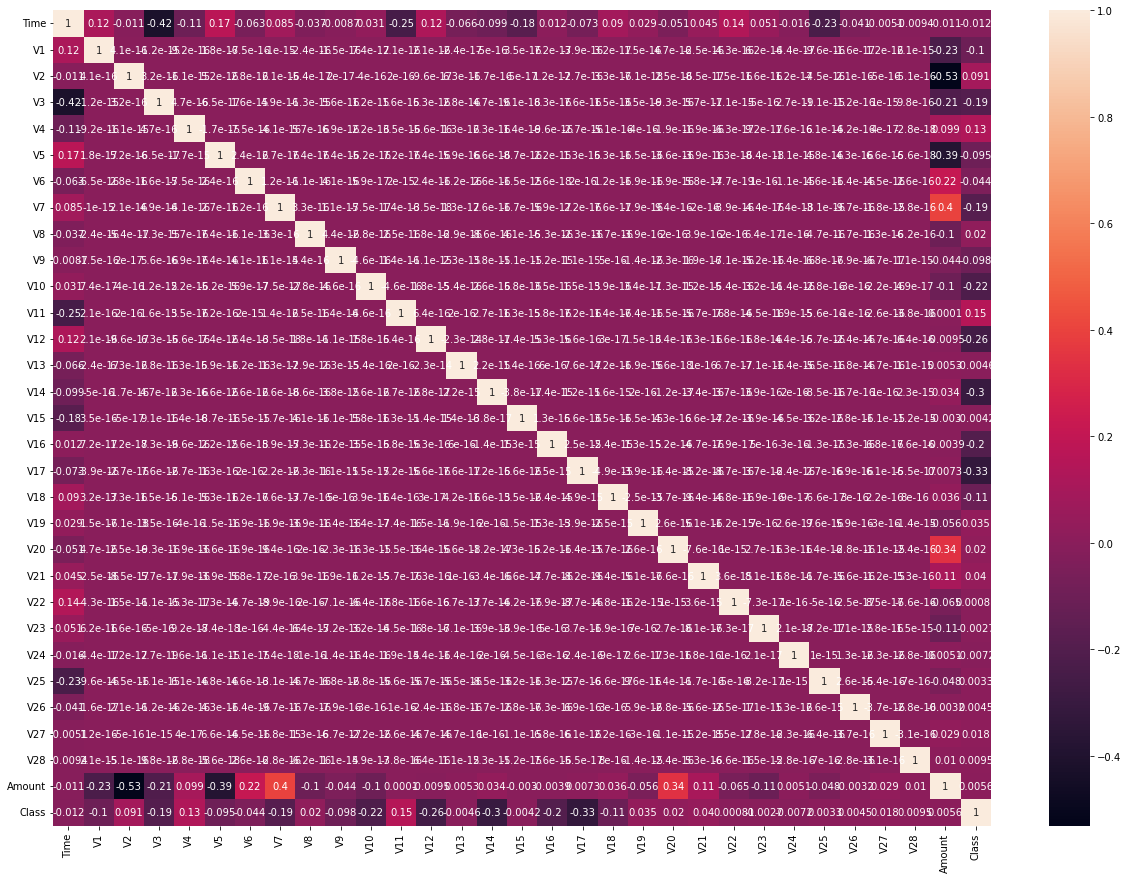

In [ ]:
plt.figure(figsize=(21,15))
sns.heatmap(df.corr(),annot=True)

# FEATURE ENGINEERING

In [ ]:
# FEATURE SELECTION ..SINCE ANALYSING FEATURES IN THE HEATMAP ABOVE IS DIFFICULT, WE'LL USE ExtraTreeClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
model=ExtraTreesClassifier()

In [ ]:
model.fit(xx,yy)

ExtraTreesClassifier()

In [ ]:
# from above heatmap important features could not be clearly seen so we do the following:
model.feature_importances_

array([0.01604016, 0.01279765, 0.01703682, 0.03334738, 0.04539456,
       0.0163147 , 0.01378205, 0.02378645, 0.01278611, 0.03215437,
       0.0778406 , 0.0537711 , 0.09651236, 0.01215008, 0.11383379,
       0.01221436, 0.06697992, 0.15386241, 0.04989691, 0.01395061,
       0.01257271, 0.01647914, 0.01271371, 0.00884525, 0.01324047,
       0.01023614, 0.01423058, 0.01161714, 0.01282197, 0.01279052])

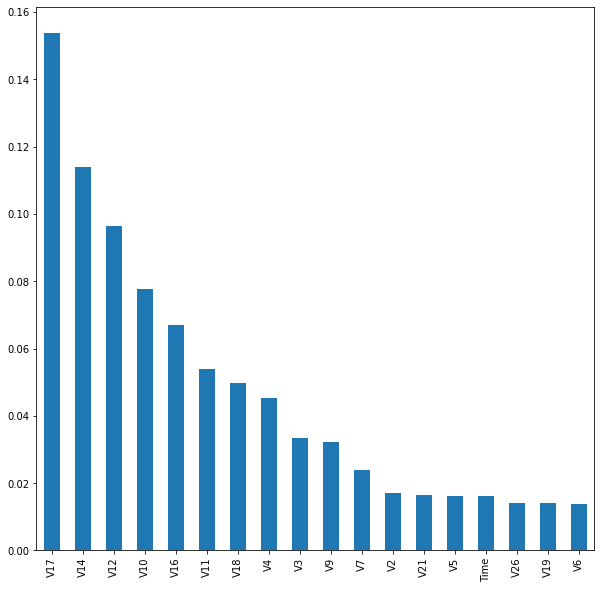

In [ ]:
plt.figure(figsize=(10,10))
featu=pd.Series(model.feature_importances_,index=xx.columns)
plot=featu.nlargest(18)
featu.nlargest(18).plot(kind='bar')
#it works by information gain formula, etc., of decision trees

In [ ]:
# to check for collinearity you can now select only these important features and draw heatmap

In [ ]:
plot.index

Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V18', 'V4', 'V3', 'V9', 'V7',
       'V2', 'V21', 'V5', 'Time', 'V26', 'V19', 'V6'],
      dtype='object')

In [ ]:
cols=['V14','V4','V12','V11','V17','V10','V16','V3','V9','V18','V5','V2','V7','Time','V19','V9','V21','V26']
xnew=xx[cols]

# TRAIN_TEST_SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xnew,yy,test_size=0.2,random_state=4)

In [ ]:
randomdf=RandomForestClassifier()
randomdf.fit(x_train,y_train)

RandomForestClassifier()

# PREDICTION

In [ ]:
y_pred=randomdf.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# MODEL EVALUATION

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9995786664794073

In [ ]:
randomdf.n_estimators

100

[Text(0.4583333333333333, 0.875, 'V14 <= -6.019\ngini = 0.003\nsamples = 144133\nvalue = [227466, 379]\nclass = Not_Fraud'),
 Text(0.25, 0.625, 'V9 <= 2.193\ngini = 0.433\nsamples = 206\nvalue = [101, 218]\nclass = Fraud'),
 Text(0.16666666666666666, 0.375, 'V18 <= 2.669\ngini = 0.348\nsamples = 184\nvalue = [63, 218]\nclass = Fraud'),
 Text(0.08333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.25, 0.125, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 22\nvalue = [38, 0]\nclass = Not_Fraud'),
 Text(0.6666666666666666, 0.625, 'V17 <= -2.952\ngini = 0.001\nsamples = 143927\nvalue = [227365, 161]\nclass = Not_Fraud'),
 Text(0.5, 0.375, 'V4 <= 0.926\ngini = 0.468\nsamples = 81\nvalue = [47, 79]\nclass = Fraud'),
 Text(0.4166666666666667, 0.125, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.125, '\n  (...)  \n'),
 Text(0.8333333333333334, 0.375, 'V12 <= -4.898\ngini = 0.001\nsamples = 143846\nvalue = [227318, 82]\nclass = Not_Fraud'),
 Text(0.75, 0.125, '\n  (...)

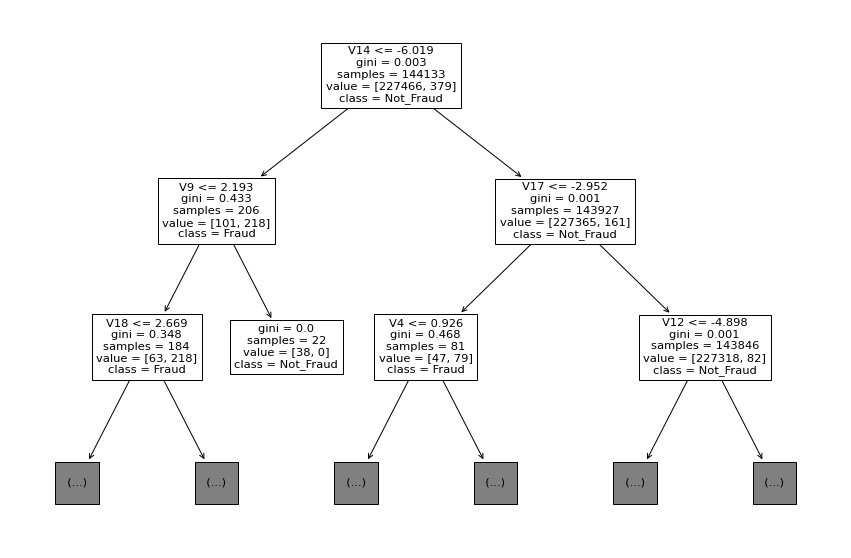

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10))
plot_tree(randomdf.estimators_[0],max_depth=2,feature_names=x_train.columns,class_names=['Not_Fraud','Fraud'])

# TRYING DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
yd_pred=dt.predict(x_test)
yd_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test,yd_pred)

0.9991573329588147

In [ ]:
dt.get_depth()

26

In [ ]:
dt.cost_complexity_pruning_path(x_train,y_train)

{'ccp_alphas': array([0.00000000e+00, 4.30914956e-06, 4.34591972e-06, 4.35355388e-06,
        4.35607261e-06, 4.36655603e-06, 4.37027225e-06, 4.37580806e-06,
        4.38584909e-06, 4.38600302e-06, 4.38631183e-06, 4.38663865e-06,
        4.38698255e-06, 4.38746404e-06, 4.38838144e-06, 4.38873131e-06,
        4.38894863e-06, 4.38900249e-06, 4.39077725e-06, 4.39142226e-06,
        4.39391909e-06, 4.39730781e-06, 4.39855025e-06, 4.40317207e-06,
        4.41120325e-06, 5.03045360e-06, 5.73127312e-06, 5.85193150e-06,
        5.98456528e-06, 6.87525356e-06, 7.18191594e-06, 7.90010753e-06,
        8.10267439e-06, 8.31050273e-06, 8.32689388e-06, 8.77278452e-06,
        1.05334767e-05, 1.16932049e-05, 1.25398532e-05, 1.29184148e-05,
        1.32517933e-05, 1.36078407e-05, 1.62246409e-05, 1.62553653e-05,
        1.65231007e-05, 3.08327574e-05, 3.72370622e-05, 5.33257258e-05,
        5.70827318e-05, 6.68991415e-05, 8.01386957e-05, 1.54370735e-04,
        2.02975064e-04, 1.72959825e-03]),
 'impuri

In [ ]:
dt.apply(x_train)

array([188, 188, 188, ..., 188, 188, 188])

In [ ]:
dt.score(x_test,y_test)

0.9991573329588147

In [ ]:
dt.get_n_leaves()

166

# VISUALIZING:

In [ ]:
from sklearn import tree

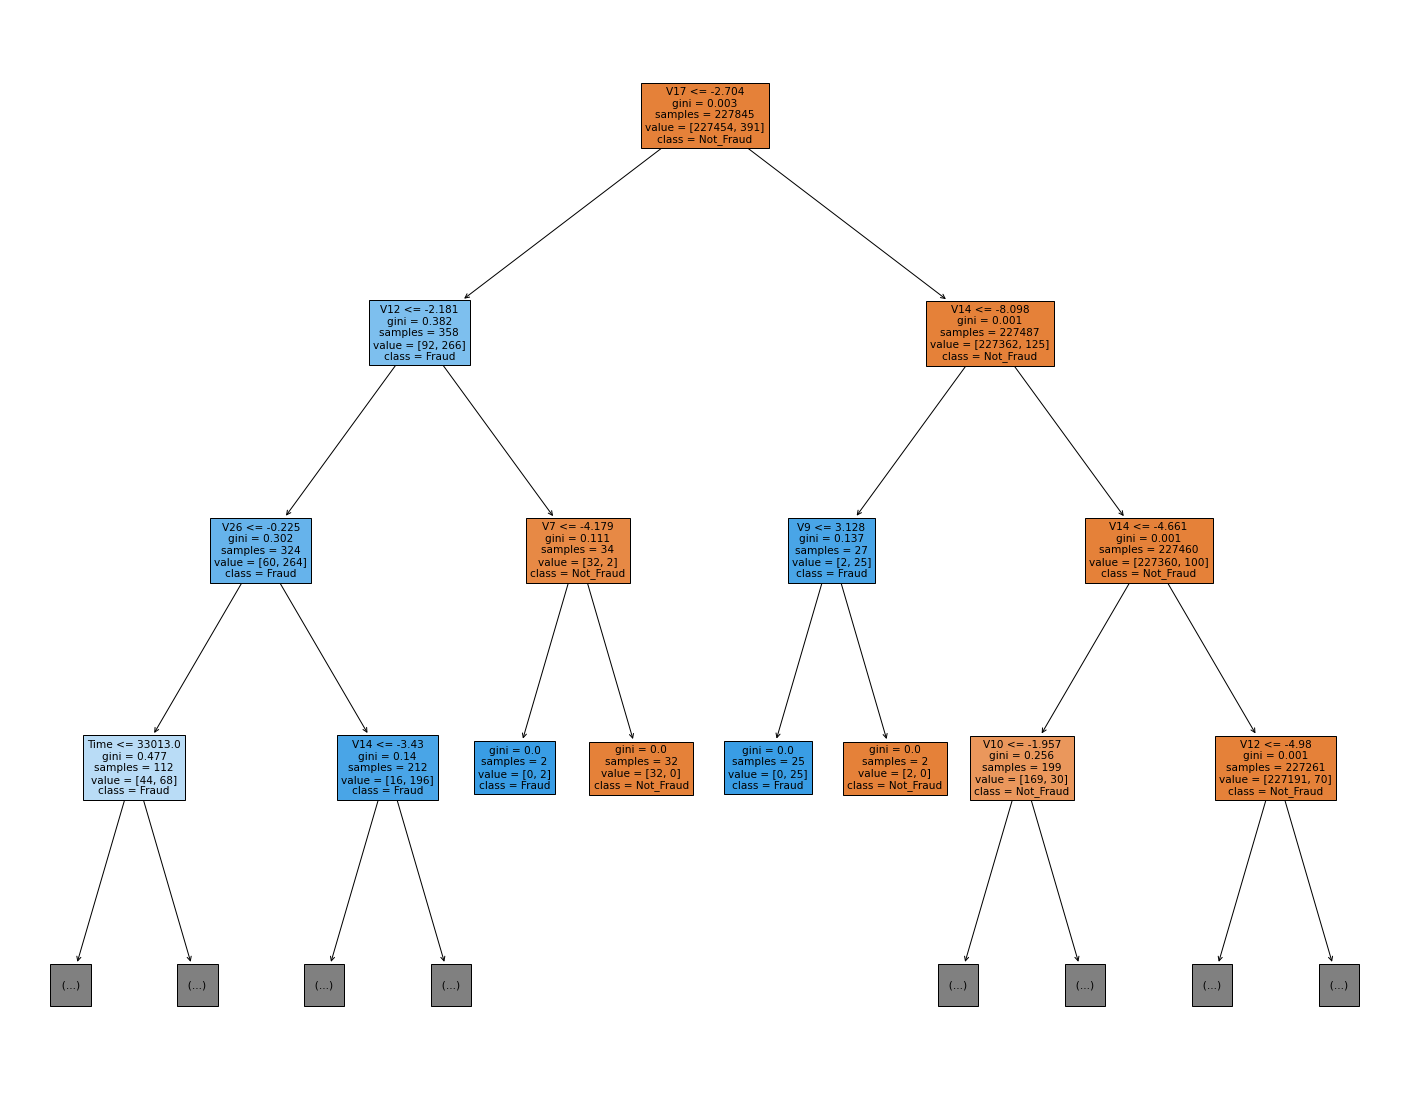

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,max_depth=3, 
                   feature_names=x_test.columns,  
                   class_names=['Not_Fraud','Fraud'],
                   filled=True)

# CONCLUSION:<BR>
Thus, `RANDOM_FOREST_CLASSIFIER` & `DECISON_TREE_CLASSIFIER` were built for classifying given data into `fraudulent_credit_card_transaction` or `genuine_transaction`. Greater accuracy score has also been achieved.